<h2 align="center">Лабораторна робота №2</h2>
<p style="margin-left: 50px"><i><b>Тема роботи:</b></i> "Геометричні перетворення координат у просторі"</br>
<i><b>Мета роботи:</b></i> опанувати методи елементарних у просторі (афінні 3D-перетворень, проєктування обєктів на площину), розробити відповідне програмне забезпечення для виконання практичних завдань, які вимагають перетворення у 3D-просторі.</p>

<h2 align="center">Завдання до лабораторної роботи</h2>
<ol>
    <li>Ознайомитись з теоретичними відомостями до лабораторної роботи. Дослідити кожне перетворення (перетворення, масштабування, поворот, відображення тощо) та їхні комбінації у просторі. Ознайомитися з матеріалом, який відноситься до проєктування об'єктів на площину.</li>
    <li>Задати куб через його вершини. Здійснити масштабування куба (збільшення, зменшення у кілька разів). Записати відповідну матрицю.</li>
    <li>Отриманий результат з поперденього пункту симетрично відобразити відносно початку координат, відносно однієї з координатних площин у тривимірній декартовій системі координат (простір).</li>
    <li>Задати пряму як у прикладі 1 даної лабораторної роботи. Здійснити поворот куба відносно прямої на деякий кут фі. Вказати перетворення, які необхідні для одержання такого результату.</li>
    <li>Задати площину, як у прикладі 2, здійснити симетрію куба відносно площини, вказати усі математичні перетворення, показати кінцевий результат, який відповідає вимогам задачі. Записати відповідні математичні перетворення.</li>
    <li>Запропонувати інший набір перетворень для отримання результатів, які наведені у прикладі 2 даної лабораторної роботи. Тобто здійснити інші перетворення за загальним підходом (симетрія, поворот, перенесення), показати їх математично.</li>
    <li>Запропонувати інший набір перетворень для отримання результатів, які наведені у прикладі 2 даної лабораторної роботи. Тобто здійснити інші перетворення за загальним підходом (симетрія, поворот, перенесення), показати їх математично.</li>
    <li>Навести алгоритм з математичним перетворенням для побудови симетрії відносно площини на основі знань з аналітичної геометрії. Порівняти результати (програмно).</li>
    <li>До пунктів 2-8 розробити програмне забезпечення. Навести результат виконання кожного пункту.</li>
    <li>Взяти той самий куб, який був поданий у попередніх пунктах. Здійснити ортогональне проєктування даного кубу на площину загального виду, яка не паралельна жодній з координатних площин. Вказати відповідні математичні перетворення, розробити відповідне програмне забезпечення.</li>
</ol>

<h2 align="center">Виконання лабораторної роботи</h2>

Імпортуємо необхідні біліотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib ipympl

print("Import complete")

Import complete


* ### Завдання №2

In [2]:
def get_rand(a=-10, b=10, n=100):
    return np.random.choice(np.linspace(a, b, n))


def set_lim(ax, n=20):
    ax.set_ylim(-n, n)
    ax.set_xlim(-n, n)
    ax.set_zlim(-n, n)


cube_xyz = np.array([get_rand(), get_rand(), get_rand()])
cube_edge = get_rand(5)
cube_dots = np.array([cube_xyz, cube_xyz+[cube_edge, 0, 0], cube_xyz+[cube_edge, cube_edge, 0], cube_xyz+[0, cube_edge, 0], cube_xyz, 
                      cube_xyz+[0, 0, cube_edge], cube_xyz+[cube_edge, 0, cube_edge], cube_xyz+[cube_edge, cube_edge, cube_edge], cube_xyz+[0, cube_edge, cube_edge], cube_xyz+[0, 0, cube_edge], 
                      cube_xyz+[cube_edge, 0, cube_edge], cube_xyz+[cube_edge, 0, 0], cube_xyz+[cube_edge, 0, cube_edge], 
                      cube_xyz+[cube_edge, cube_edge, cube_edge], cube_xyz+[cube_edge, cube_edge, 0], cube_xyz+[cube_edge, cube_edge, cube_edge], 
                      cube_xyz+[0, cube_edge, cube_edge], cube_xyz+[0, cube_edge, 0], cube_xyz+[0, cube_edge, cube_edge]])

cube_dots = np.concatenate((cube_dots, np.ones((cube_dots.shape[0], 1))), axis=1)

In [3]:
def matrix_scale(a, b, c):
    return np.array([[a, 0, 0, 0], 
                     [0, b, 0, 0], 
                     [0, 0, c, 0], 
                     [0, 0, 0, 1]])

def matrix_translation(a, b, c):
    return np.array([[1, 0, 0, a], 
                     [0, 1, 0, b], 
                     [0, 0, 1, c], 
                     [0, 0, 0, 1]])

def matrix_rot_X(fi):
    return np.array([[1, 0, 0, 0], 
                     [0, np.cos(fi), -np.sin(fi), 0], 
                     [0, np.sin(fi), np.cos(fi), 0], 
                     [0, 0, 0, 1]])


def matrix_rot_Y(fi):
    return np.array([[np.cos(fi), 0, -np.sin(fi), 0], 
                     [0, 1, 0, 0], 
                     [np.sin(fi), 0, np.cos(fi), 0], 
                     [0, 0, 0, 1]])


def matrix_rot_Z(fi):
    return np.array([[np.cos(fi), -np.sin(fi), 0, 0], 
                     [np.sin(fi), np.cos(fi), 0, 0], 
                     [0, 0, 1, 0], 
                     [0, 0, 0, 1]])

def plot_cube(ax, cube_dots, name=""):
    ax.plot(cube_dots[..., 0], cube_dots[..., 1], cube_dots[..., 2])
    ax.set_title(name)

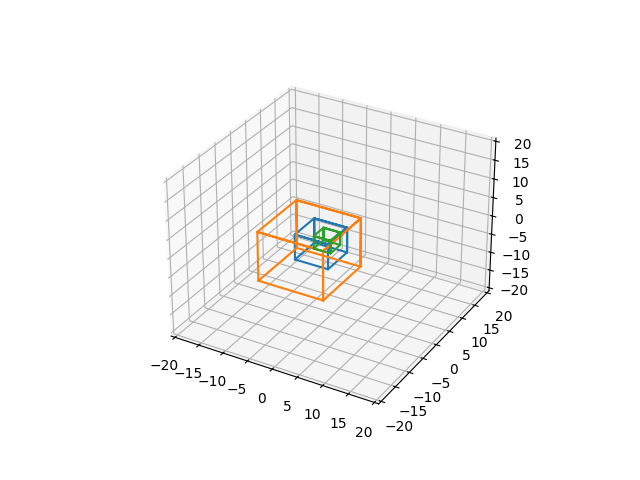

In [4]:
cube_bigger = np.inner(cube_dots, matrix_scale(2, 2, 2))
cube_smaller = np.inner(cube_dots, matrix_scale(1/2, 1/2, 1/2))

ax = plt.figure().add_subplot(projection='3d')
set_lim(ax)
plot_cube(ax, cube_dots)
plot_cube(ax, cube_bigger)
plot_cube(ax, cube_smaller)
display()

In [5]:
print(matrix_scale(2, 2, 2),"\n\n", matrix_scale(1/2, 1/2, 1/2))

[[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 1]] 

 [[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  1. ]]


* ### Завдання №3

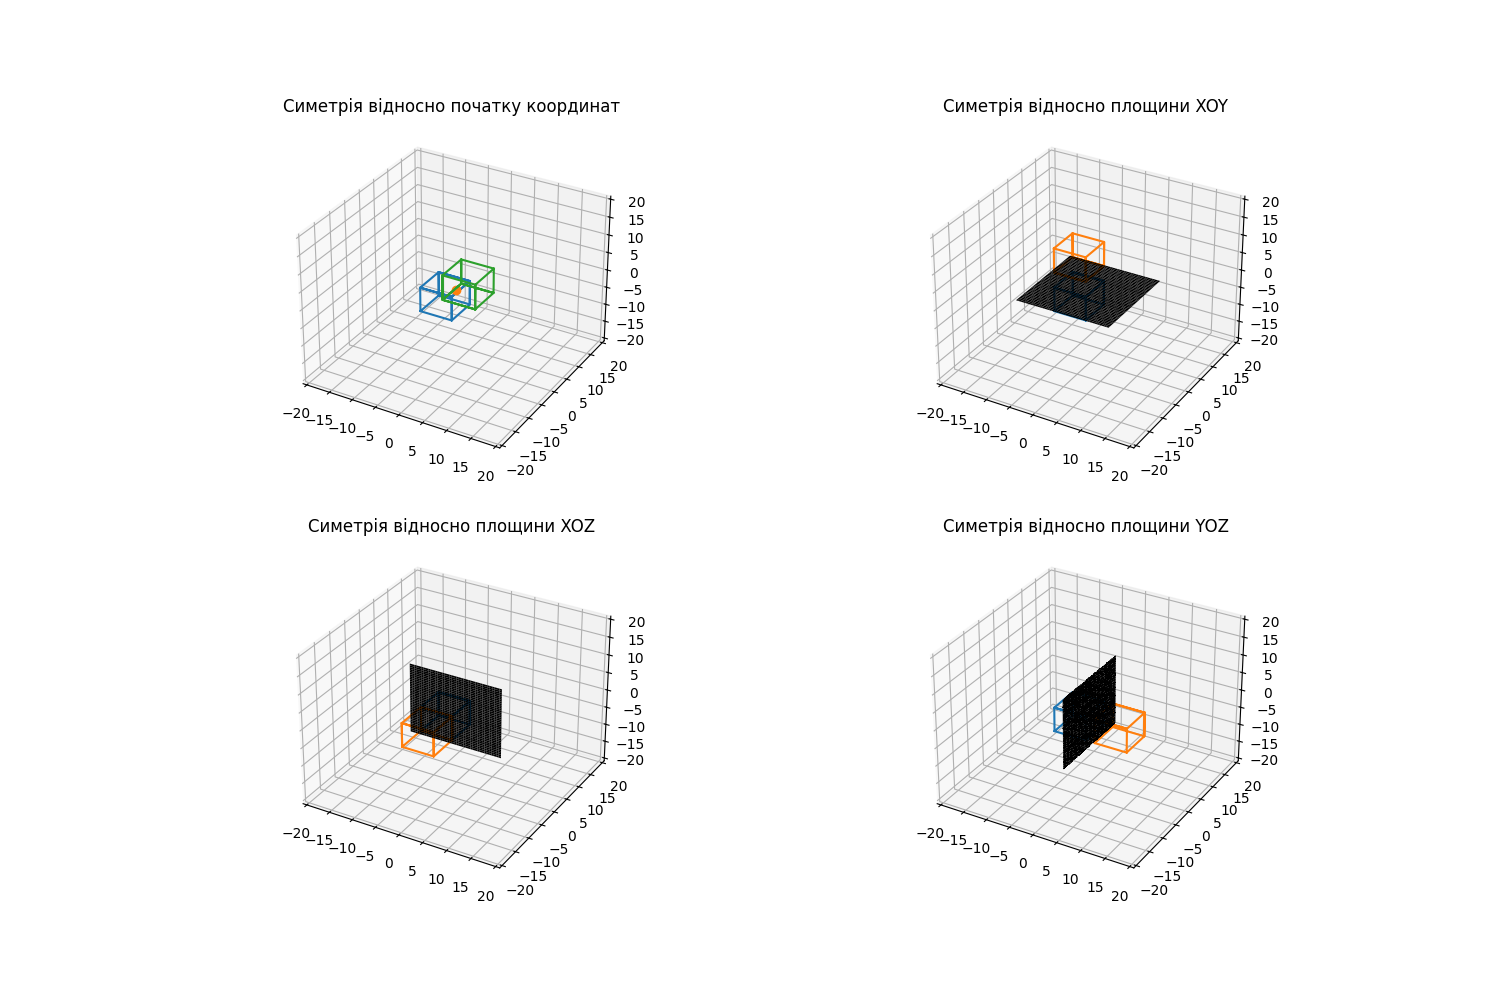

In [6]:
cube_sym_o = np.inner(cube_dots, matrix_scale(-1, -1, -1))
cube_sym_xy = np.inner(cube_dots, matrix_scale(1, 1, -1))
cube_sym_xz = np.inner(cube_dots, matrix_scale(1, -1, 1))
cube_sym_yz = np.inner(cube_dots, matrix_scale(-1, 1, 1))

fig, [ax1, ax2] = plt.subplots(2, 2, figsize=(15,10), subplot_kw=dict(projection='3d'))

set_lim(ax1[0], 20)
plot_cube(ax1[0], cube_dots)
ax1[0].plot(0, 0, 0, marker="o")
plot_cube(ax1[0], cube_sym_o, "Симетрія відносно початку координат")

set_lim(ax1[1], 20)
plot_cube(ax1[1], cube_dots)
X = np.arange(-10, 10, 0.5)
Y = np.arange(-10, 10, 0.5)
X, Y = np.meshgrid(X, Y)
ax1[1].plot_surface(X, Y, np.array([[0]]), color="black")
plot_cube(ax1[1], cube_sym_xy, "Симетрія відносно площини XOY")

set_lim(ax2[0], 20)
plot_cube(ax2[0], cube_dots)
X = np.arange(-10, 10, 0.5)
Z = np.arange(-10, 10, 0.5)
X, Z = np.meshgrid(X, Y)
ax2[0].plot_surface(X, np.array([[0]]), Z, color="black")
plot_cube(ax2[0], cube_sym_xz, "Симетрія відносно площини XOZ")

set_lim(ax2[1], 20)
plot_cube(ax2[1], cube_dots)
Y = np.arange(-10, 10, 0.5)
Z = np.arange(-10, 10, 0.5)
Y, Z = np.meshgrid(X, Y)
ax2[1].plot_surface(np.array([[0]]), Y, Z, color="black")
plot_cube(ax2[1], cube_sym_yz, "Симетрія відносно площини YOZ")

* ### Завдання №4

Кут фі:173.98328690807796•


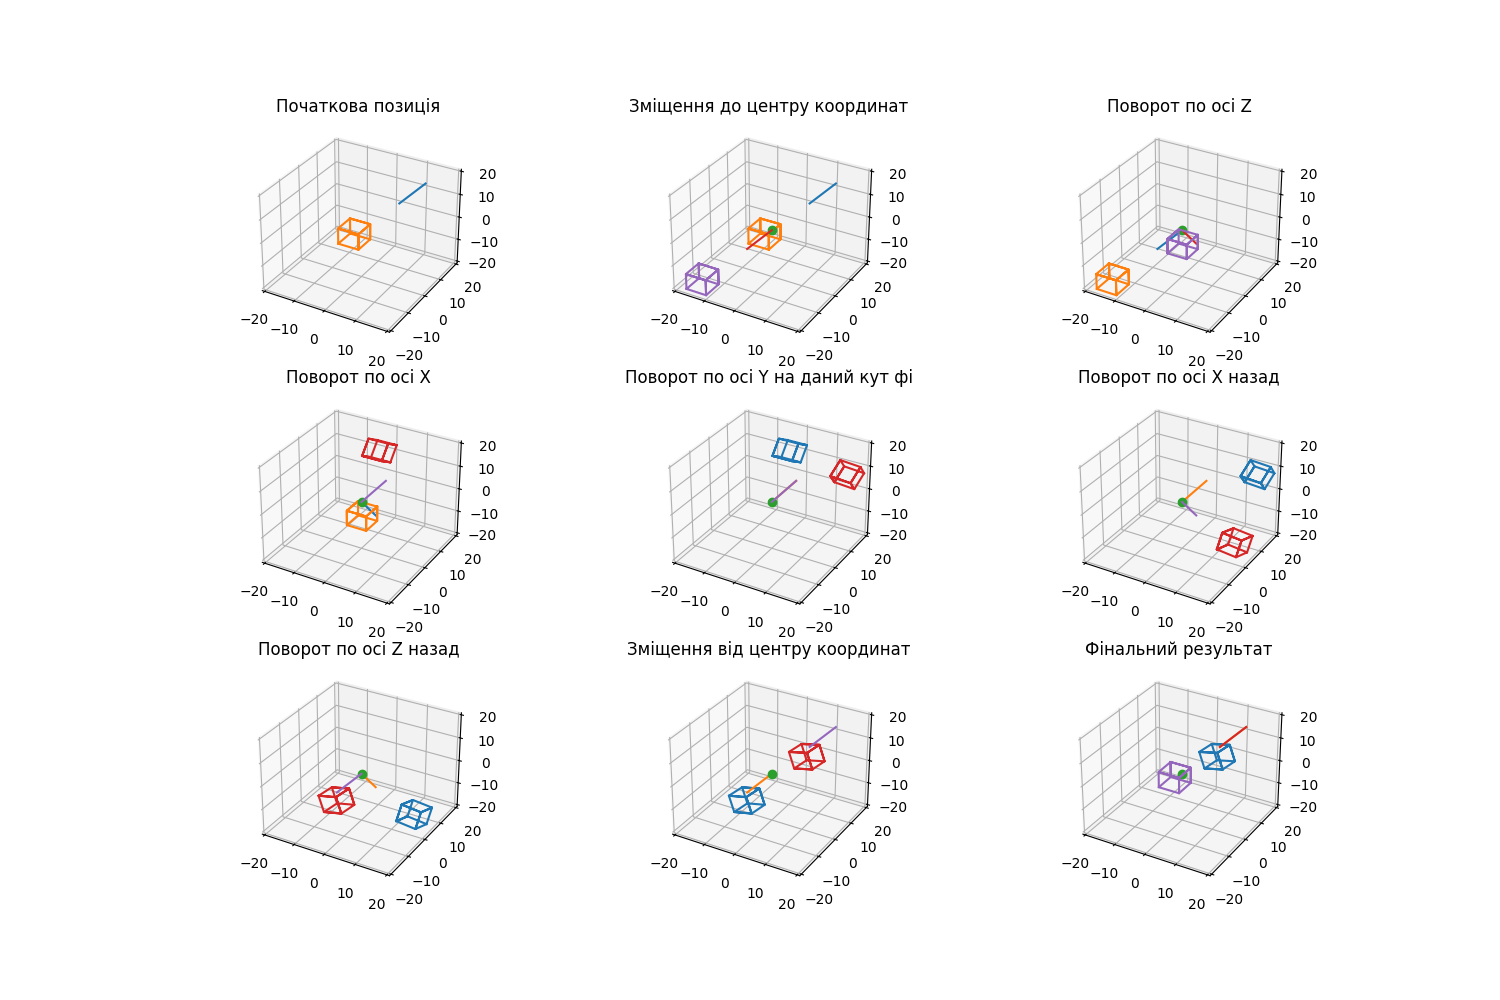

In [7]:
def get_random_coordinate(a, b, n):
    return np.random.choice(np.linspace(a, b, n), 3)

fig, [ax1, ax2, ax3] = plt.subplots(3, 3, figsize=(15,10), subplot_kw=dict(projection='3d'))

a = np.array(get_random_coordinate(-20, 20, 25))
b = np.array(get_random_coordinate(-20, 20, 25))
c = np.concatenate((np.array([a, b]), np.ones((2, 1))), axis=1)

fi = np.random.choice(np.linspace(-np.pi, np.pi, 360))
print(f"Кут фі:{fi/np.pi * 180}•")

set_lim(ax1[0], 20)
plot_cube(ax1[0], c)
plot_cube(ax1[0], cube_dots, "Початкова позиція")

set_lim(ax1[1], 20)
plot_cube(ax1[1], c)
plot_cube(ax1[1], cube_dots)
ax1[1].plot(0, 0, 0, marker="o")
d = a
cube_to_o = np.inner(cube_dots, matrix_translation(-d[0], -d[1], -d[2]))
line_to_o = np.inner(c, matrix_translation(-d[0], -d[1], -d[2]))
plot_cube(ax1[1], line_to_o)
plot_cube(ax1[1], cube_to_o, "Зміщення до центру координат")

set_lim(ax1[2], 20)
plot_cube(ax1[2], line_to_o)
plot_cube(ax1[2], cube_to_o)
ax1[2].plot(0, 0, 0, marker="o")
alpha = np.arctan2(line_to_o[1, 0], line_to_o[1, 1])
cube_rot_z = np.inner(cube_to_o, matrix_rot_Z(alpha))
line_rot_z = np.inner(line_to_o, matrix_rot_Z(alpha))
plot_cube(ax1[2], line_rot_z)
plot_cube(ax1[2], cube_rot_z, "Поворот по осі Z")

set_lim(ax2[0], 20)
plot_cube(ax2[0], line_rot_z)
plot_cube(ax2[0], cube_rot_z)
ax2[0].plot(0, 0, 0, marker="o")
beta = -np.arctan2(line_rot_z[1, 2], line_rot_z[1, 1])
cube_rot_x = np.inner(cube_rot_z, matrix_rot_X(beta))
line_rot_x = np.inner(line_rot_z, matrix_rot_X(beta))
plot_cube(ax2[0], cube_rot_x)
plot_cube(ax2[0], line_rot_x, "Поворот по осі X")

set_lim(ax2[1], 20)
plot_cube(ax2[1], cube_rot_x)
plot_cube(ax2[1], line_rot_x)
ax2[1].plot(0, 0, 0, marker="o")
cube_final_rot_y = np.inner(cube_rot_x, matrix_rot_Y(fi))
line_final_rot_y = np.inner(line_rot_x, matrix_rot_Y(fi))
plot_cube(ax2[1], cube_final_rot_y)
plot_cube(ax2[1], line_final_rot_y, "Поворот по осі Y на даний кут фі")

set_lim(ax2[2], 20)
plot_cube(ax2[2], cube_final_rot_y)
plot_cube(ax2[2], line_final_rot_y)
ax2[2].plot(0, 0, 0, marker="o")
cube_rot_x_back = np.inner(cube_final_rot_y, matrix_rot_X(-beta))
line_rot_x_back = np.inner(line_final_rot_y, matrix_rot_X(-beta))
plot_cube(ax2[2], cube_rot_x_back)
plot_cube(ax2[2], line_rot_x_back, "Поворот по осі X назад")

set_lim(ax3[0], 20)
plot_cube(ax3[0], cube_rot_x_back)
plot_cube(ax3[0], line_rot_x_back)
ax3[0].plot(0, 0, 0, marker="o")
cube_rot_z_back = np.inner(cube_rot_x_back, matrix_rot_Z(-alpha))
line_rot_z_back = np.inner(line_rot_x_back, matrix_rot_Z(-alpha))
plot_cube(ax3[0], cube_rot_z_back)
plot_cube(ax3[0], line_rot_z_back, "Поворот по осі Z назад")

set_lim(ax3[1], 20)
plot_cube(ax3[1], cube_rot_z_back)
plot_cube(ax3[1], line_rot_z_back)
ax3[1].plot(0, 0, 0, marker="o")
cube_to_o_back = np.inner(cube_rot_z_back, matrix_translation(d[0], d[1], d[2]))
line_to_o_back = np.inner(line_rot_z_back, matrix_translation(d[0], d[1], d[2]))
plot_cube(ax3[1], cube_to_o_back)
plot_cube(ax3[1], line_to_o_back, "Зміщення від центру координат")

set_lim(ax3[2], 20)
plot_cube(ax3[2], cube_to_o_back)
plot_cube(ax3[2], line_to_o_back)
ax3[2].plot(0, 0, 0, marker="o")
plot_cube(ax3[2], c)
plot_cube(ax3[2], cube_dots, "Фінальний результат")

* ### Завдання №5-7, 10

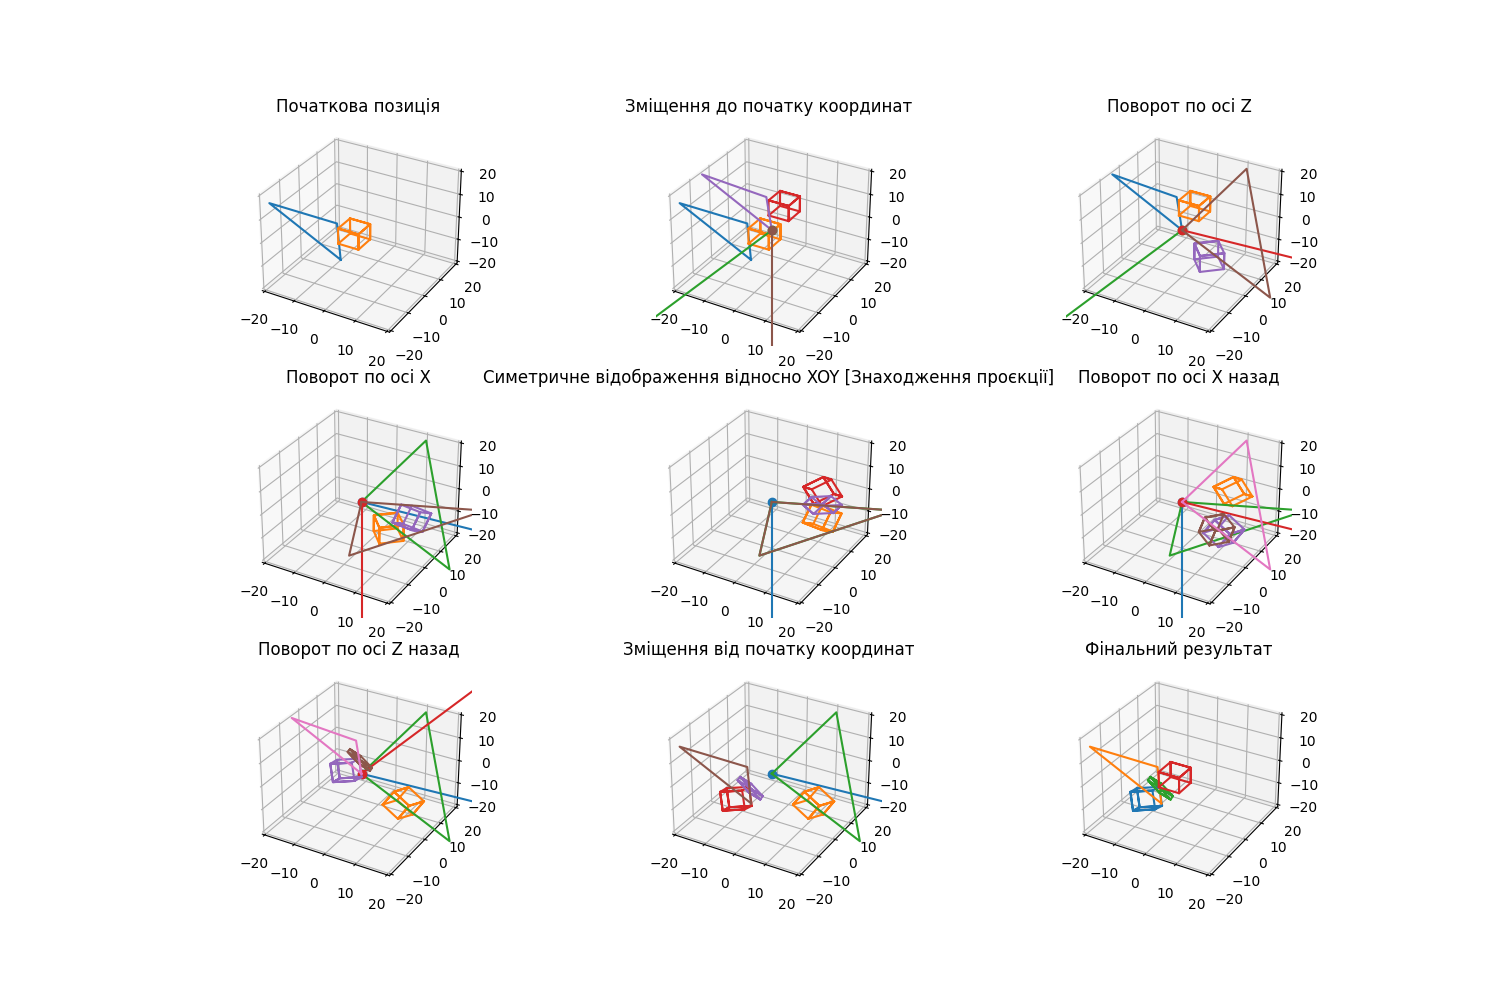

In [8]:
plane_dots = np.array([get_random_coordinate(-20, 20, 25), 
                       get_random_coordinate(-20, 20, 25), 
                       get_random_coordinate(-20, 20, 25)])

plane_dots = np.concatenate((plane_dots, np.ones((3, 1))), axis=1)
plane_dots = np.append(plane_dots, np.array([plane_dots[0]]), axis=0)

def plot_n(ax, normal):
    ax.plot(normal[..., 0], normal[..., 1], normal[..., 2], marker="o")

def plane_coef(dots):
    dot1, dot2, dot3 = dots
    x1, y1, z1 = dot1
    x2, y2, z2 = dot2
    x3, y3, z3 = dot3
    
    A = (y2 - y1) * (z3 - z1) - (z2 - z1) * (y3 - y1)
    B = (z2 - z1) * (x3 - x1) - (x2 - x1) * (z3 - z1)
    C = (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)
    D = -A * x1 - B * y1 - C * z1
    
    return A, B, C, D

A, B, C, D = plane_coef(plane_dots[:3, :3])

normal = np.array([[0, 0, 0, 1], [A, B, C, 1]])

fig, [ax1, ax2, ax3] = plt.subplots(3, 3, figsize=(15,10), subplot_kw=dict(projection='3d'))

set_lim(ax1[0], 20)
plot_cube(ax1[0], plane_dots)
plot_cube(ax1[0], cube_dots, "Початкова позиція")

set_lim(ax1[1], 20)
plot_cube(ax1[1], plane_dots)
plot_cube(ax1[1], cube_dots)
plot_n(ax1[1], normal)
d = plane_dots[0, :3]
cube_p_to_o = np.inner(cube_dots, matrix_translation(-d[0], -d[1], -d[2]))
plane_to_o = np.inner(plane_dots, matrix_translation(-d[0], -d[1], -d[2]))
plot_cube(ax1[1], cube_p_to_o)
plot_cube(ax1[1], plane_to_o, "Зміщення до початку координат")


set_lim(ax1[2], 20)
plot_cube(ax1[2], plane_to_o)
plot_cube(ax1[2], cube_p_to_o)
plot_n(ax1[2], normal)
alpha = np.arctan2(A, B)
cube_p_rot_z = np.inner(cube_p_to_o, matrix_rot_Z(alpha))
plane_rot_z = np.inner(plane_to_o, matrix_rot_Z(alpha))
normal_rot_z = np.inner(normal, matrix_rot_Z(alpha))
plot_n(ax1[2], normal_rot_z)
plot_cube(ax1[2], cube_p_rot_z)
plot_cube(ax1[2], plane_rot_z, "Поворот по осі Z")

set_lim(ax2[0], 20)
plot_n(ax2[0], normal_rot_z)
plot_cube(ax2[0], cube_p_rot_z)
plot_cube(ax2[0], plane_rot_z)
beta = np.arctan2(normal_rot_z[1, 1], normal_rot_z[1, 2])
cube_p_rot_x = np.inner(cube_p_rot_z, matrix_rot_X(beta))
plane_rot_x = np.inner(plane_rot_z, matrix_rot_X(beta))
normal_rot_x = np.inner(normal_rot_z, matrix_rot_X(beta))
plot_n(ax2[0], normal_rot_x)
plot_cube(ax2[0], cube_p_rot_x)
plot_cube(ax2[0], plane_rot_x, "Поворот по осі X")

set_lim(ax2[1], 20)
plot_n(ax2[1], normal_rot_x)
plot_cube(ax2[1], cube_p_rot_x)
plot_cube(ax2[1], plane_rot_x)
cube_p_symm = np.inner(cube_p_rot_x, matrix_scale(1, 1, -1))
plane_symm = np.inner(plane_rot_x, matrix_scale(1, 1, -1))
normal_symm = np.inner(normal_rot_x, matrix_scale(1, 1, -1))
cube_proection = np.inner(cube_p_rot_x, matrix_scale(1, 1, 0))
plot_n(ax1[1], normal_symm)
plot_cube(ax2[1], cube_p_symm)
plot_cube(ax2[1], cube_proection)
plot_cube(ax2[1], plane_symm, "Симетричне відображення відносно XOY [Знаходження проєкції]")

set_lim(ax2[2], 20)
plot_n(ax2[2], normal_symm)
plot_cube(ax2[2], cube_p_symm)
plot_cube(ax2[2], plane_symm)
cube_p_rot_x_back = np.inner(cube_p_symm, matrix_rot_X(-beta))
plane_rot_x_back = np.inner(plane_symm, matrix_rot_X(-beta))
normal_rot_x_back = np.inner(normal_symm, matrix_rot_X(-beta))
cube_proection_rot_x_back = np.inner(cube_proection, matrix_rot_X(-beta))
plot_n(ax2[2], normal_rot_x_back)
plot_cube(ax2[2], cube_p_rot_x_back)
plot_cube(ax2[2], cube_proection_rot_x_back)
plot_cube(ax2[2], plane_rot_x_back, "Поворот по осі X назад")

set_lim(ax3[0], 20)
plot_n(ax3[0], normal_rot_x_back)
plot_cube(ax3[0], cube_p_rot_x_back)
plot_cube(ax3[0], plane_rot_x_back)
cube_p_rot_z_back = np.inner(cube_p_rot_x_back, matrix_rot_Z(-alpha))
plane_rot_z_back = np.inner(plane_rot_x_back, matrix_rot_Z(-alpha))
normal_rot_z_back = np.inner(normal_rot_x_back, matrix_rot_Z(-alpha))
cube_proection_rot_z_back = np.inner(cube_proection_rot_x_back, matrix_rot_Z(-alpha))
plot_n(ax3[0], normal_rot_z_back)
plot_cube(ax3[0], cube_p_rot_z_back)
plot_cube(ax3[0], cube_proection_rot_z_back)
plot_cube(ax3[0], plane_rot_z_back, "Поворот по осі Z назад")

set_lim(ax3[1], 20)
plot_n(ax3[1], normal_rot_x_back)
plot_cube(ax3[1], cube_p_rot_x_back)
plot_cube(ax3[1], plane_rot_x_back)
cube_p_to_o_back = np.inner(cube_p_rot_z_back, matrix_translation(d[0], d[1], d[2]))
plane_to_o_back = np.inner(plane_rot_z_back, matrix_translation(d[0], d[1], d[2]))
cube_proection_final = np.inner(cube_proection_rot_z_back, matrix_translation(d[0], d[1], d[2]))
plot_cube(ax3[1], cube_p_to_o_back)
plot_cube(ax3[1], cube_proection_final)
plot_cube(ax3[1], plane_to_o_back, "Зміщення від початку координат")

set_lim(ax3[2], 20)
plot_cube(ax3[2], cube_p_to_o_back)
plot_cube(ax3[2], plane_dots)
plot_cube(ax3[2], cube_proection_final)
plot_cube(ax3[2], cube_dots, "Фінальний результат")

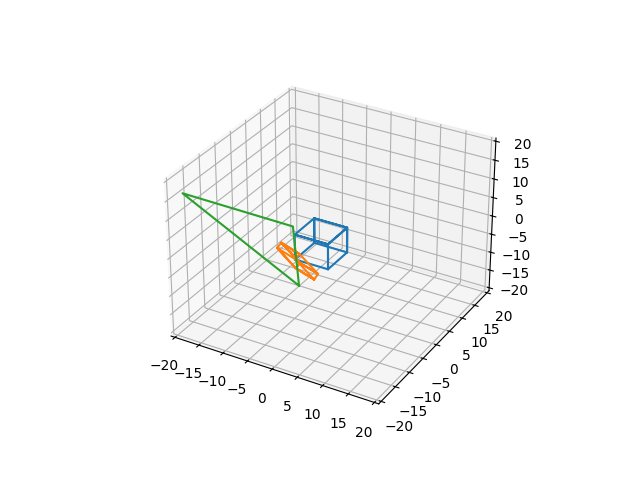

In [9]:
ax = plt.figure().add_subplot(projection='3d')
set_lim(ax)
plot_cube(ax, cube_dots)
plot_cube(ax, cube_proection_final)
plot_cube(ax, plane_dots)
display()

* ### Завдання №8

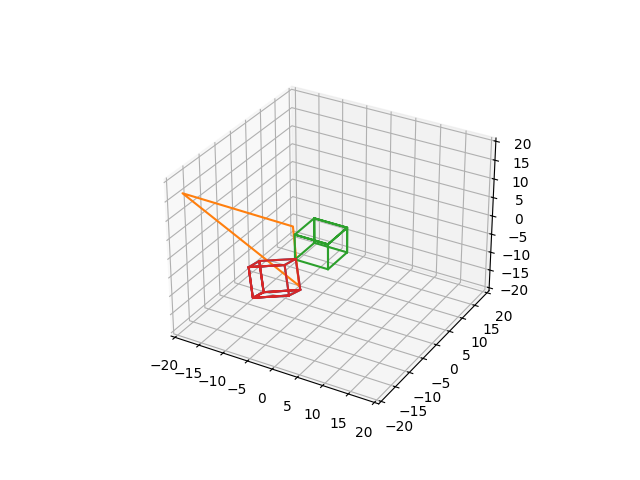

In [10]:
def find_symm(A, B, C, D, x0, y0, z0):
    xs = -2*A*(D + A*x0 + B*y0 + C*z0)/(A**2 + B**2 + C**2) + x0
    ys = -2*B*(D + A*x0 + B*y0 + C*z0)/(A**2 + B**2 + C**2) + y0
    zs = -2*C*(D + A*x0 + B*y0 + C*z0)/(A**2 + B**2 + C**2) + z0
    return np.array([xs, ys, zs])

ax = plt.figure().add_subplot(projection='3d')
set_lim(ax)
sym_cube = find_symm(A, B, C, D, cube_dots[..., 0], cube_dots[..., 1], cube_dots[..., 2])
ax.plot(sym_cube[0], sym_cube[1], sym_cube[2])
plot_cube(ax, plane_dots)
plot_cube(ax, cube_dots)
plot_cube(ax, cube_p_to_o_back)
display()